<a href="https://colab.research.google.com/github/blackgreenc/AI/blob/main/Tacotron2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://github.com/carpedm20/multi-speaker-tacotron-tensorflow">자료1</a>
<a href="https://joungheekim.github.io/2021/04/02/code-review/">자료2</a>

<h1>Multi-Speaker Tacotron in TensorFlow</h1>

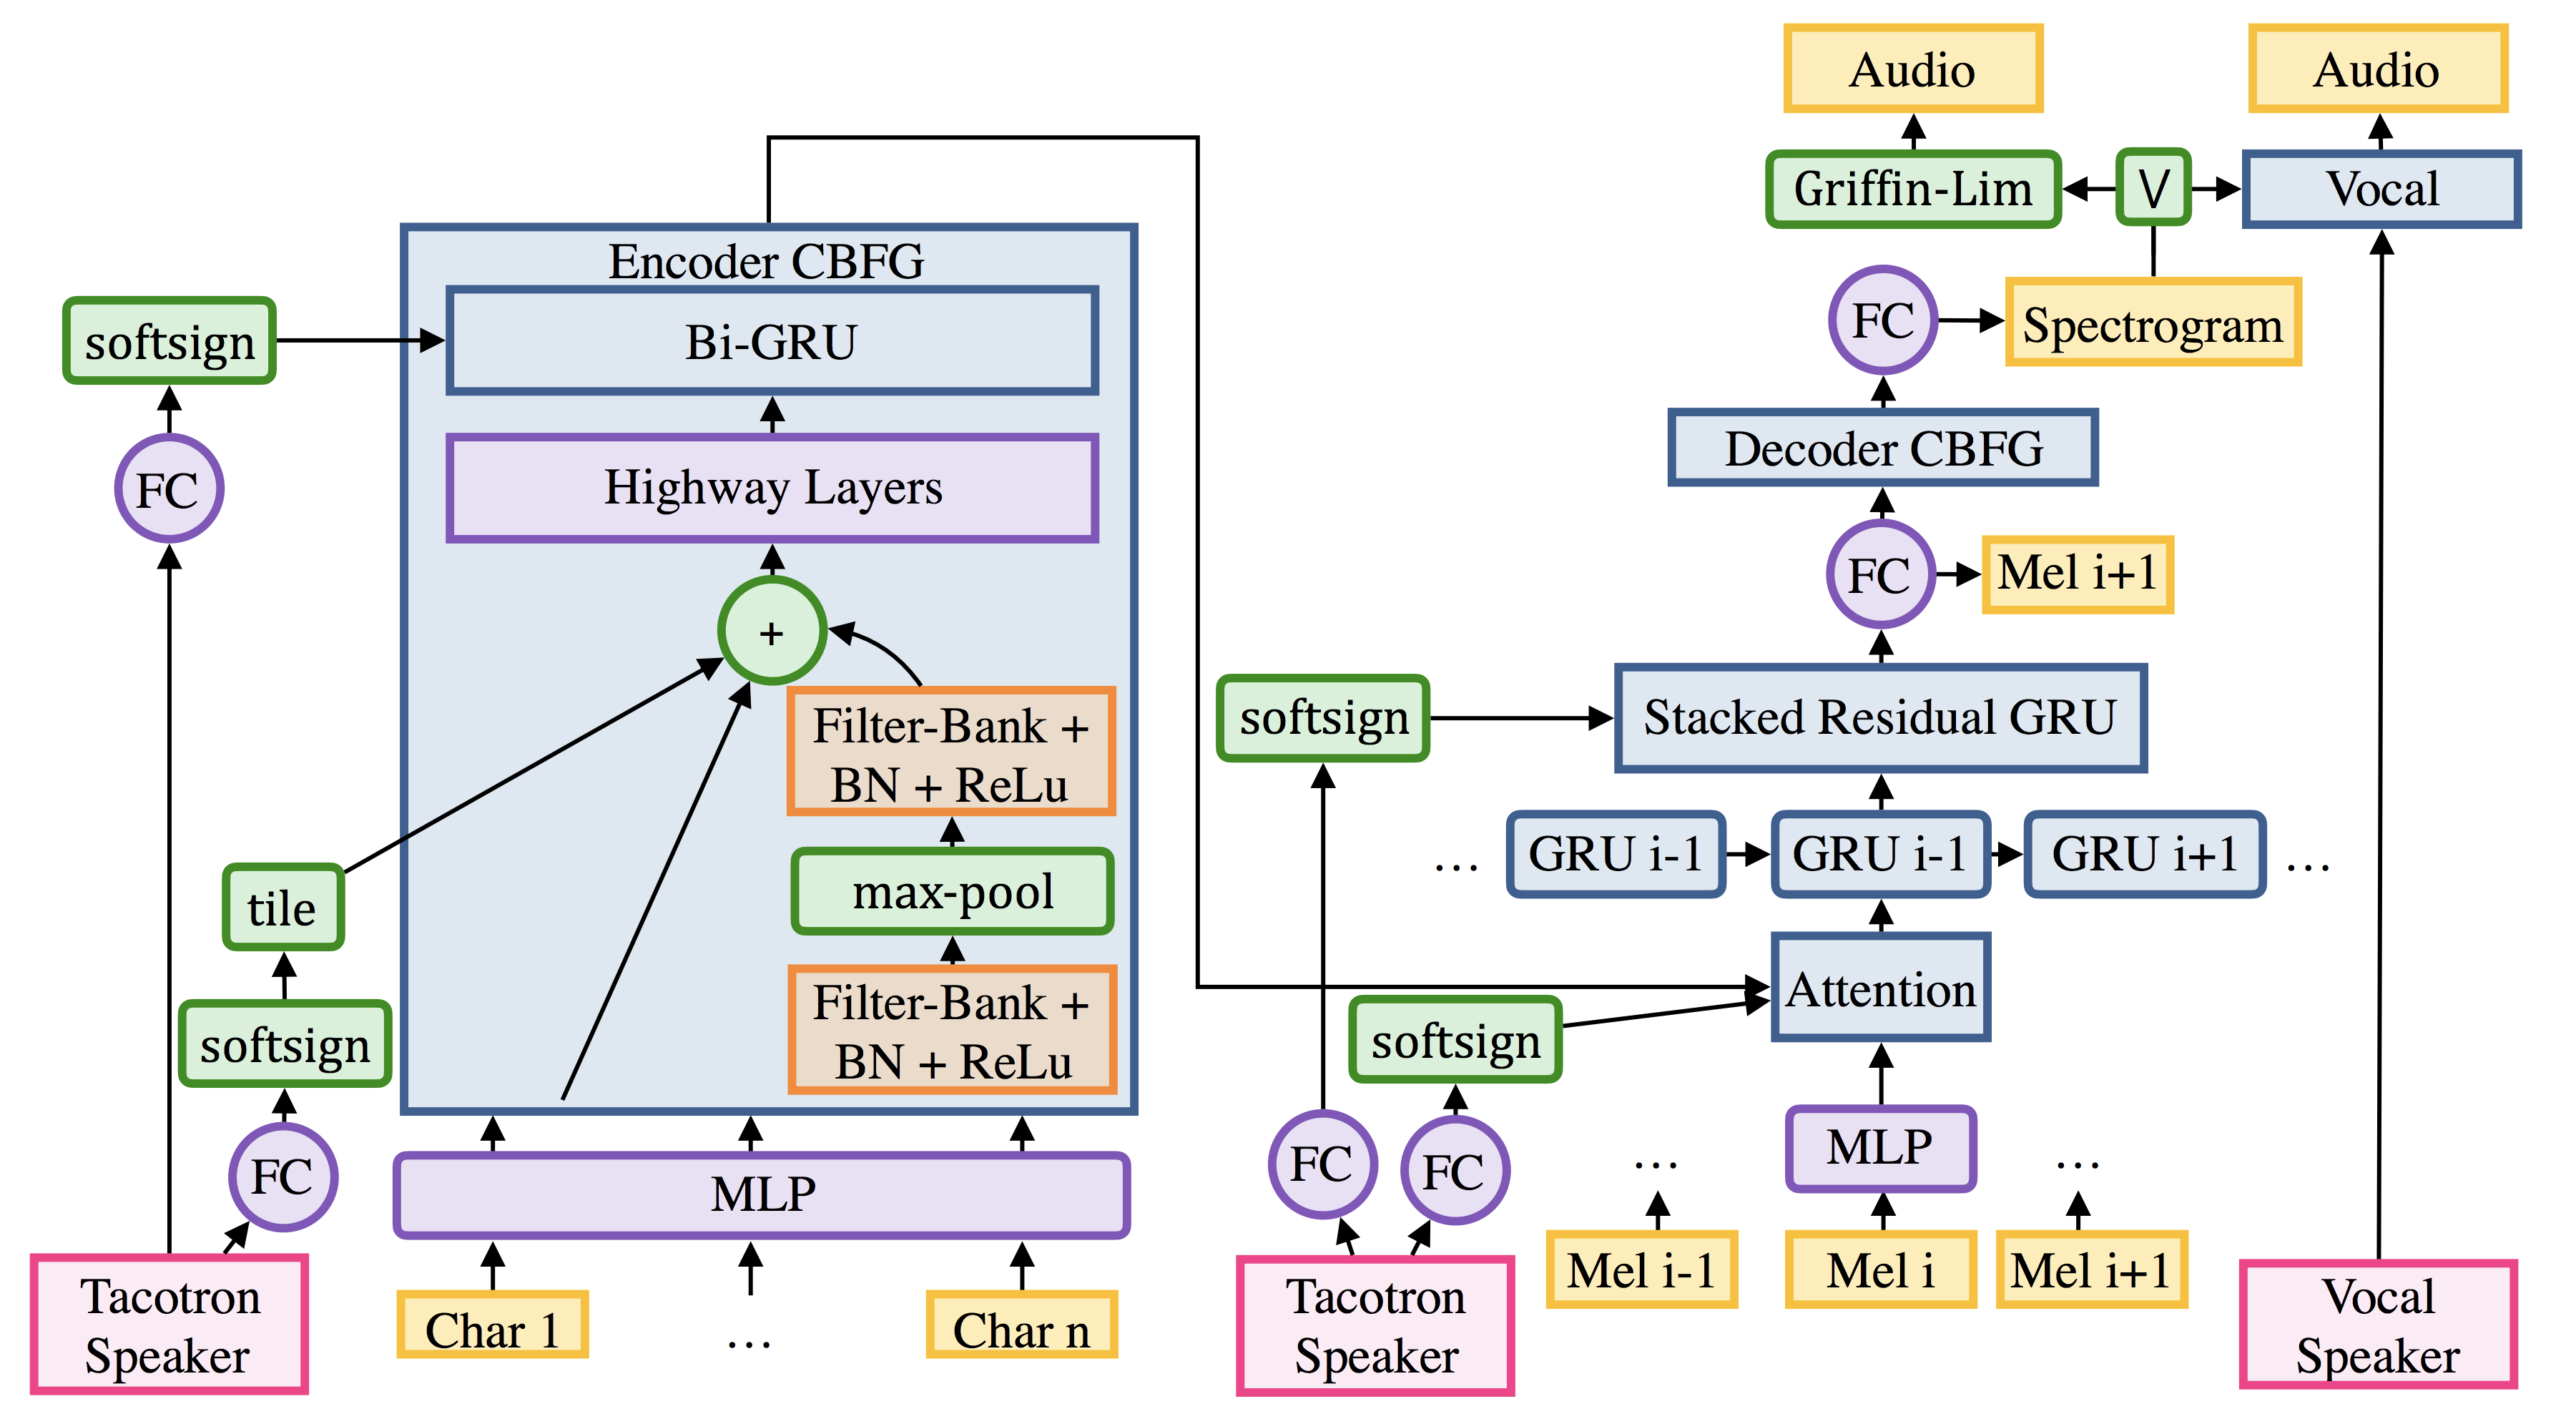

<h2>1, Install prerequisites</h2>

<h4>After preparing TensorFlow, install prerequisites with:</h4>

In [ ]:
!pip3 install -r requirements.txt
!python -c "import nltk; nltk.download('punkt')"

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<h2>Generate custom datasets</h2>

In [ ]:
!python3 -m datasets.generate_data ./datasets/YOUR_DATASET/alignment.json

/usr/bin/python3: Error while finding module specification for 'datasets.generate_data' (ModuleNotFoundError: No module named 'datasets')


In [ ]:
!python3 -m datasets.generate_data ./datasets/YOUR_DATASET/alignment.json

/usr/bin/python3: Error while finding module specification for 'datasets.generate_data' (ModuleNotFoundError: No module named 'datasets')


<h2>Generate Korean datasets</h2>

In [ ]:
!export GOOGLE_APPLICATION_CREDENTIALS="YOUR-GOOGLE.CREDENTIALS.json"

<h3>1. Download speech(or video)and text</h3>

In [ ]:
!python3 -m datasets.son.download

/usr/bin/python3: Error while finding module specification for 'datasets.son.download' (ModuleNotFoundError: No module named 'datasets')


<h3>2. Segment all audios on silence</h3>

In [ ]:
!python3 -m audio.silence --audio_pattern "./datasets/son/audio/*.wav" --method=pydub

/usr/bin/python3: Error while finding module specification for 'audio.silence' (ModuleNotFoundError: No module named 'audio')


<h3>3, By using <a href="https://cloud.google.com/speech-to-text">Google Speech Recognition API</a>, we predict sentences for all segmented audios.</h3>

In [ ]:
!python3 -m recognition.google --audio_pattern "./datasets/son/audio/*.*.wav"

/usr/bin/python3: Error while finding module specification for 'recognition.google' (ModuleNotFoundError: No module named 'recognition')


<h4>4, By comparing original text and recognised text, save audio<->text pair information into ./datasets/son/alignment.json.</h4>

In [ ]:
!python3 -m recognition.alignment --recognition_path "./datasets/son/recognition.json" --score_threshold=0.5

/usr/bin/python3: Error while finding module specification for 'recognition.alignment' (ModuleNotFoundError: No module named 'recognition')


In [ ]:
!python3 -m datasets.generate_data ./datasets/son/alignment.json

/usr/bin/python3: Error while finding module specification for 'datasets.generate_data' (ModuleNotFoundError: No module named 'datasets')


In [ ]:
! python3 -m datasets.LJSpeech_1_0.prepare

/usr/bin/python3: Error while finding module specification for 'datasets.LJSpeech_1_0.prepare' (ModuleNotFoundError: No module named 'datasets')


In [ ]:
! python3 -m datasets.generate_data ./datasets/LJSpeech_1_0

/usr/bin/python3: Error while finding module specification for 'datasets.generate_data' (ModuleNotFoundError: No module named 'datasets')


In [ ]:
!python3 train.py --data_path=datasets/son
!python3 train.py --data_path=datasets/son --initialize_path=PATH_TO_CHECKPOINT

python3: can't open file 'train.py': [Errno 2] No such file or directory
python3: can't open file 'train.py': [Errno 2] No such file or directory


In [ ]:
# after change `model_type` in `hparams.py` to `deepvoice` or `simple`
!python3 train.py --data_path=datasets/son1,datasets/son2

python3: can't open file 'train.py': [Errno 2] No such file or directory


In [ ]:
!python3 train.py --data_path=datasets/son --load_path logs/son-20171015

python3: can't open file 'train.py': [Errno 2] No such file or directory


In [ ]:
!python3 app.py --load_path logs/son-20171015 --num_speakers=1

python3: can't open file 'app.py': [Errno 2] No such file or directory


In [ ]:
!python3 synthesizer.py --load_path logs/son-20171015 --text "이거 실화냐?"

python3: can't open file 'synthesizer.py': [Errno 2] No such file or directory


In [ ]:
!python3 app.py --load_path logs/LJSpeech_1_0-20180108 --num_speakers=1 --is_korean=False
!python3 synthesizer.py --load_path logs/LJSpeech_1_0-20180108 --text="Winter is coming." --is_korean=False

python3: can't open file 'app.py': [Errno 2] No such file or directory
python3: can't open file 'synthesizer.py': [Errno 2] No such file or directory
